## Extracting coronavirus and country data

# Covid-19 Analysis

Looking at the Covid-19 data obtained from 'Our World in Data'.

**Index:**

- [Countries with total cases per capita, top 5](#Highest-total-cases-per-capita,-top-5)
- [Countries with highest death rate per cases, top 5](#Highest-death-rate-per-total-cases,-top-5)
- [Canada, US, and Pakistan](#Canada,-US,-and-Pakistan)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import requests

In [2]:
r = requests.get('https://covid.ourworldindata.org/data/ecdc/full_data.csv')

In [3]:
with open('full_data.csv', 'wb') as fd:
    for chunk in r.iter_content(chunk_size = 128):
        fd.write(chunk)

In [30]:
rdata = pd.read_csv('full_data.csv')
rpopulation_data = pd.read_csv('population_data.csv') 

In [31]:
rdata.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [32]:
rpopulation_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN


## Filtering and cleaning data 

In [33]:
print("Data Types", rdata.dtypes)
print("Columns with NaN", rdata.columns[rdata.isna().any()])

Data Types date            object
location        object
new_cases        int64
new_deaths       int64
total_cases      int64
total_deaths     int64
dtype: object
Columns with NaN Index([], dtype='object')


In [34]:
rdata = rdata.fillna(value = 0)
pdata = rdata.astype({'new_cases':'int64', 
                     'new_deaths':'int64', 
                     'total_deaths':'int64'})
pdata.dtypes

date            object
location        object
new_cases        int64
new_deaths       int64
total_cases      int64
total_deaths     int64
dtype: object

In [35]:
rdata['date_fm'] = pd.to_datetime(rdata['date'], infer_datetime_format='%Y-%m-%d')

In [36]:
rdata.dtypes

date                    object
location                object
new_cases                int64
new_deaths               int64
total_cases              int64
total_deaths             int64
date_fm         datetime64[ns]
dtype: object

In [37]:
latest = pdata['date'].max()
latest

'2020-03-20'

In [38]:
data = pdata[pdata['date'] == latest]
data.head()
data = data.drop('date', axis = 1)
world_record = data[data['location'] == 'World']
data = data.set_index('location')

In [39]:
data = data[data.index != 'World']
print(world_record)

     location  new_cases  new_deaths  total_cases  total_deaths
5917    World      29222        1042       242476          9885


In [40]:
max_total_cases = data['total_cases'].max()
print("Max value in total cases", max_total_cases)


Max value in total cases 81337


In [41]:
population = rpopulation_data.filter(['Country Name', '2018'])
population[population['Country Name'] == 'Canada']

,Country Name,2018
33,Canada,37058856.0


In [42]:
population = population.rename(columns = {'Country Name':'location'})
population = population.set_index('location')
population.head(n=1)

,2018
location,
Aruba,105845.0


In [43]:
data['total_cases_pc'] = data['total_cases'].div(data.index.map(population['2018']))
data['total_deaths_pc'] = data['total_deaths'].div(data.index.map(population['2018']))
data['deaths_per_total'] = data['total_deaths'].div(data['total_cases'])
data['deaths_per_total'] = data['deaths_per_total'].round(decimals = 4)
data.head()

,new_cases,new_deaths,total_cases,total_deaths,total_cases_pc,total_deaths_pc,deaths_per_total
location,,,,,,,
Afghanistan,0,0,22,0,5.918372e-07,0.000000e+00,0.0000
Albania,11,0,70,2,2.442108e-05,6.977452e-07,0.0286
Algeria,9,1,82,7,1.941820e-06,1.657651e-07,0.0854
Andorra,22,0,75,0,9.739501e-04,0.000000e+00,0.0000
Argentina,31,1,128,3,2.876760e-06,6.742406e-08,0.0234


In [44]:
data.dtypes

new_cases             int64
new_deaths            int64
total_cases           int64
total_deaths          int64
total_cases_pc      float64
total_deaths_pc     float64
deaths_per_total    float64
dtype: object

## Plots

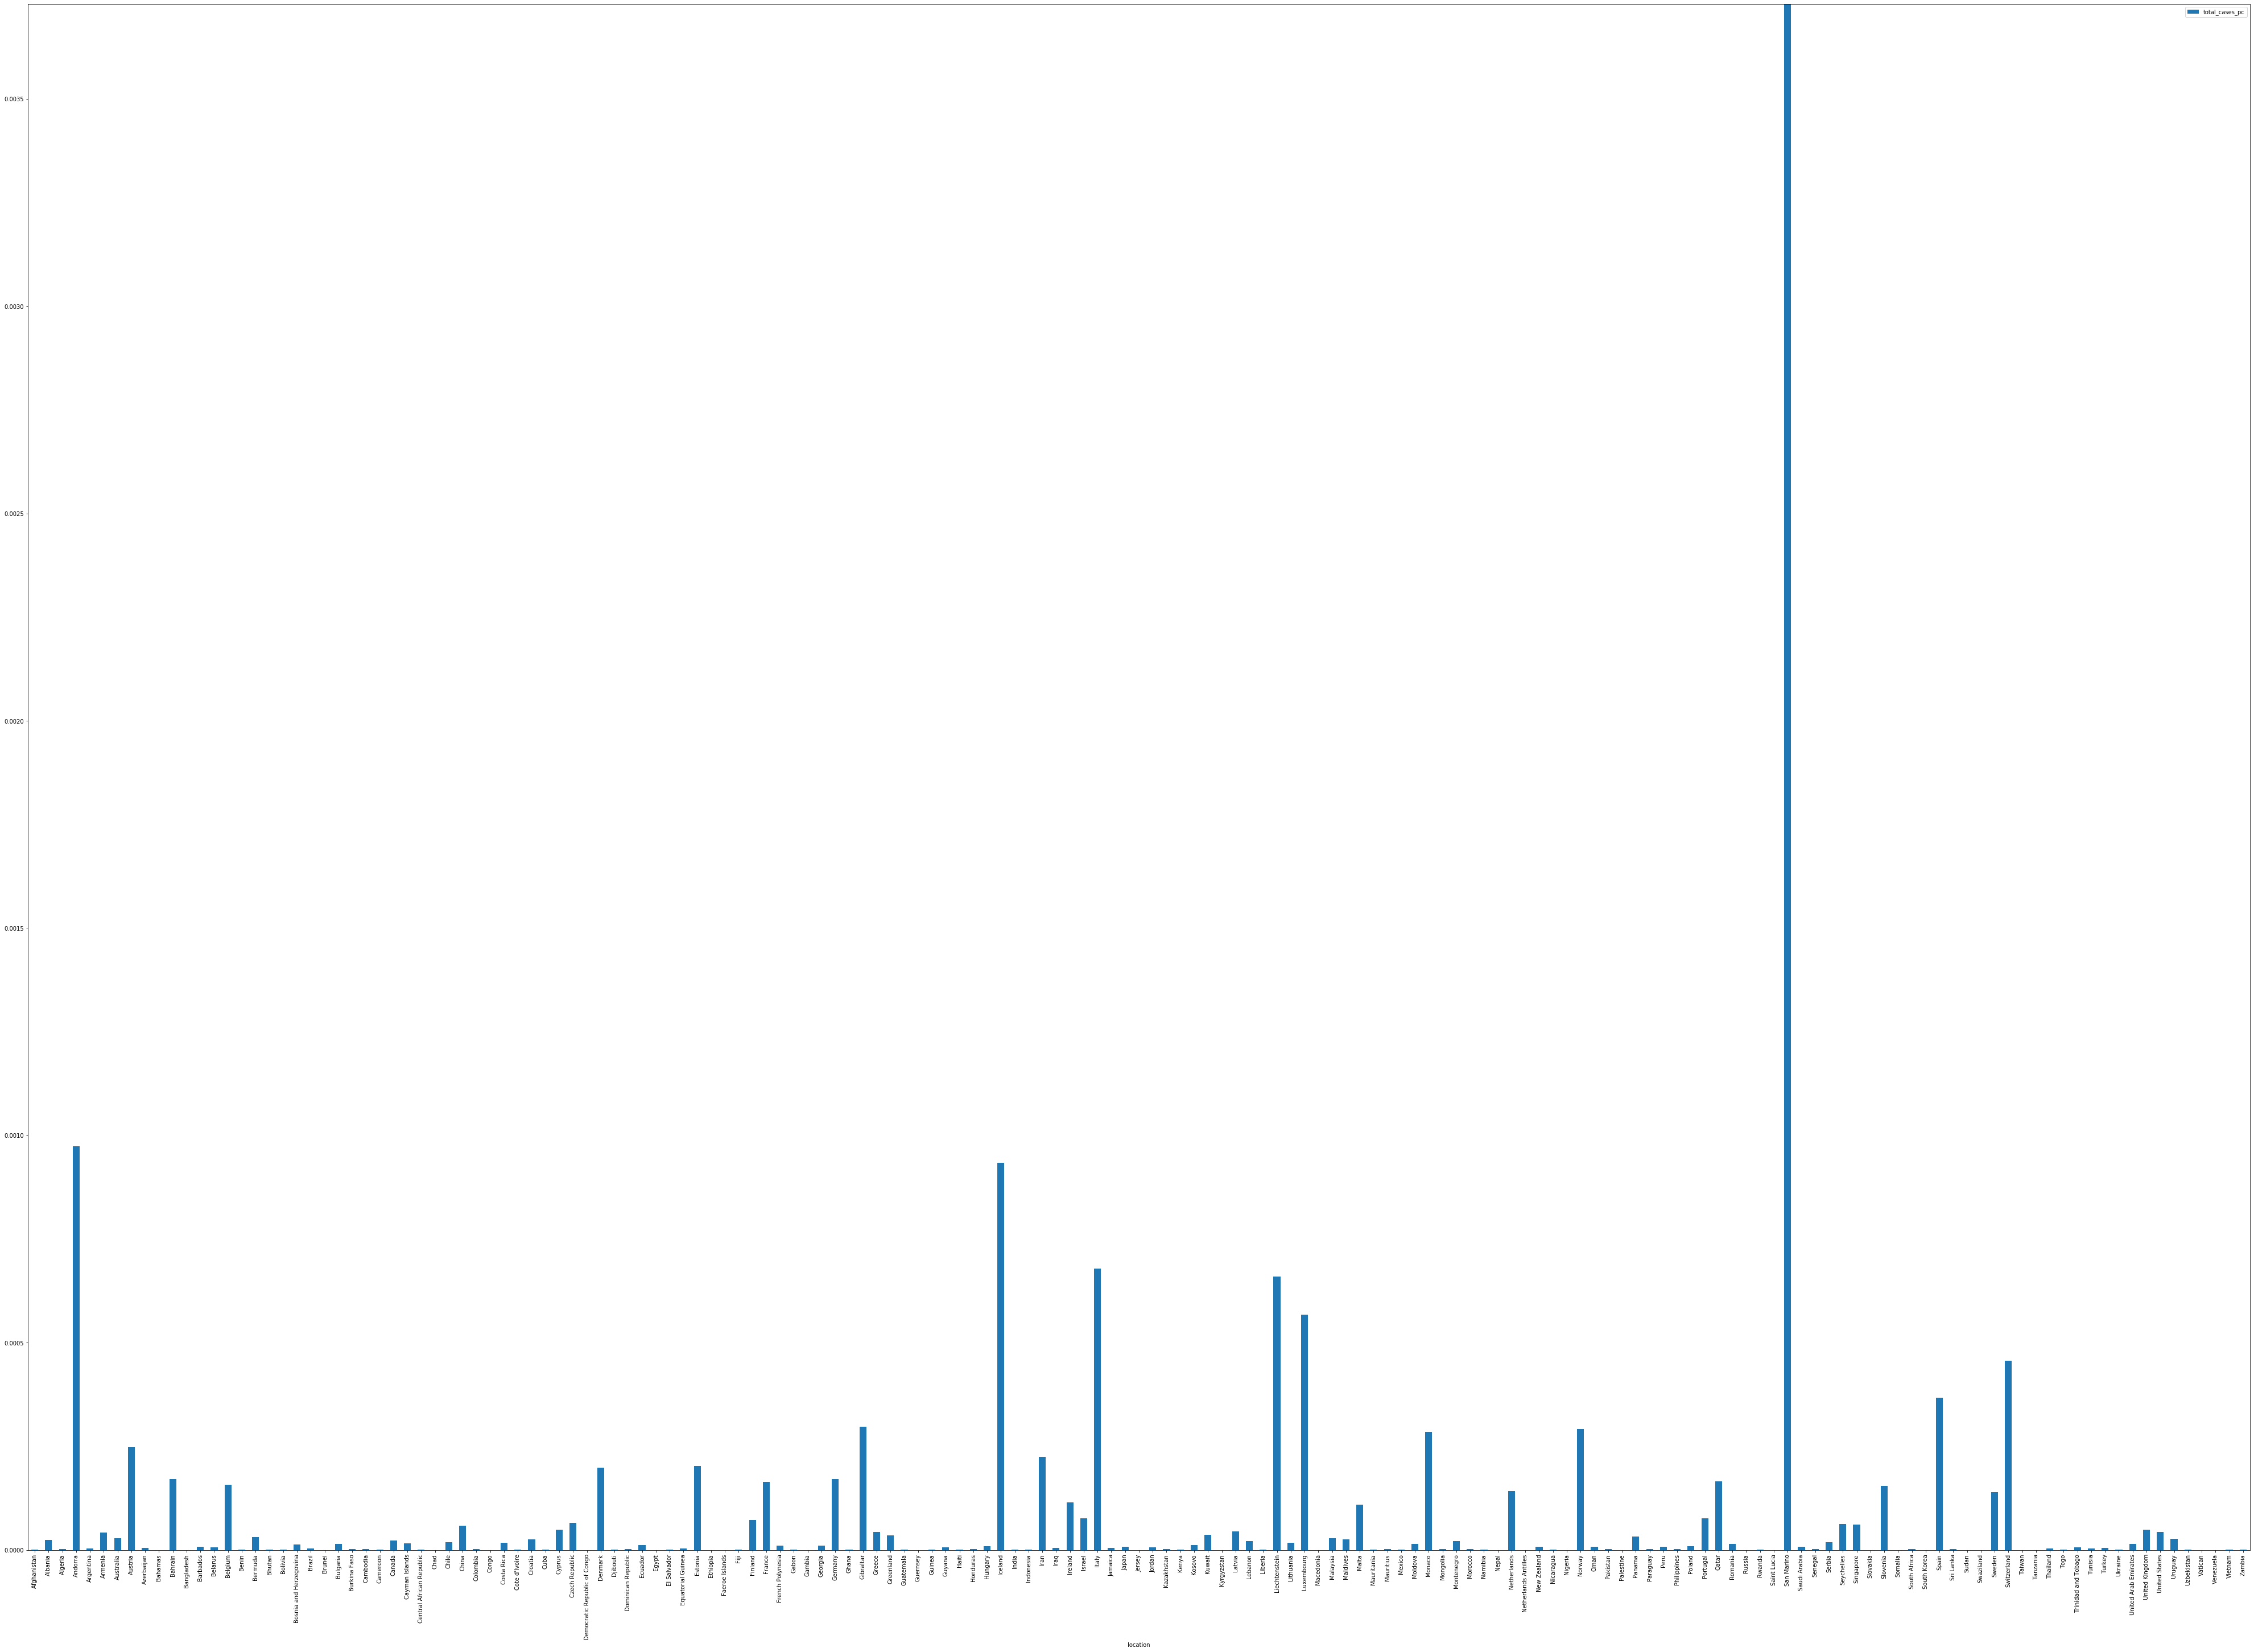

In [45]:
all_rows = data.plot(kind='bar', y = 'total_cases_pc', 
                     figsize = (70, 50), ylim = (0, data['total_cases_pc'].max())).get_figure()
plt.savefig('all_rows.png')

In [46]:
largest5 = data.nlargest(5, 'total_cases_pc')
largest5

,new_cases,new_deaths,total_cases,total_deaths,total_cases_pc,total_deaths_pc,deaths_per_total
location,,,,,,,
San Marino,17,0,126,14,0.003729,0.000414,0.1111
Andorra,22,0,75,0,0.000974,0.000000,0.0000
Iceland,80,1,330,1,0.000933,0.000003,0.0030
Italy,5322,429,41035,3407,0.000679,0.000056,0.0830
Liechtenstein,0,0,25,0,0.000659,0.000000,0.0000


### Highest total cases per capita, top 5

In [47]:
largest5['total_cases_pc']

location
San Marino       0.003729
Andorra          0.000974
Iceland          0.000933
Italy            0.000679
Liechtenstein    0.000659
Name: total_cases_pc, dtype: float64

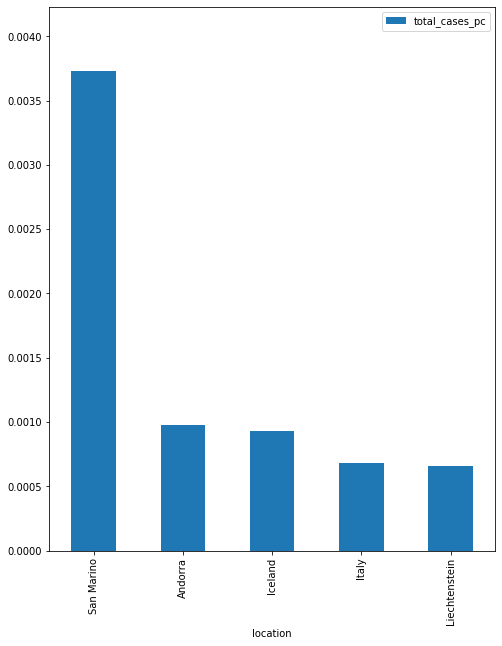

In [48]:
total_cases_pc_fig = largest5.plot(kind='bar', 
                                   y = 'total_cases_pc', 
                                   ylim = (0, data['total_cases_pc'].max()+ 0.0005),
                                   figsize = (8, 10)).get_figure()
plt.savefig('total_cases_pc.png')

In [49]:
print(population[population.index == 'San Marino'])
print(data[data.index == 'San Marino'])

               2018
location           
San Marino  33785.0
            new_cases  new_deaths  total_cases  total_deaths  total_cases_pc  \
location                                                                       
San Marino         17           0          126            14        0.003729   

            total_deaths_pc  deaths_per_total  
location                                       
San Marino         0.000414            0.1111  


### Highest death rate per total cases, top 5

In [50]:
deaths_per_cases = data[data['total_cases'] > 50].nlargest(5, 'deaths_per_total')
deaths_per_cases

,new_cases,new_deaths,total_cases,total_deaths,total_cases_pc,total_deaths_pc,deaths_per_total
location,,,,,,,
San Marino,17,0,126,14,3.729466e-03,4.143851e-04,0.1111
Algeria,9,1,82,7,1.941820e-06,1.657651e-07,0.0854
Indonesia,55,14,227,19,8.480800e-07,7.098467e-08,0.0837
Italy,5322,429,41035,3407,6.790357e-04,5.637808e-05,0.0830
Philippines,28,1,230,18,2.156548e-06,1.687733e-07,0.0783


In [51]:
deaths_per_cases['deaths_per_total']

location
San Marino     0.1111
Algeria        0.0854
Indonesia      0.0837
Italy          0.0830
Philippines    0.0783
Name: deaths_per_total, dtype: float64

In [52]:
deaths_per_cases_pop = deaths_per_cases.merge(population, on = 'location')

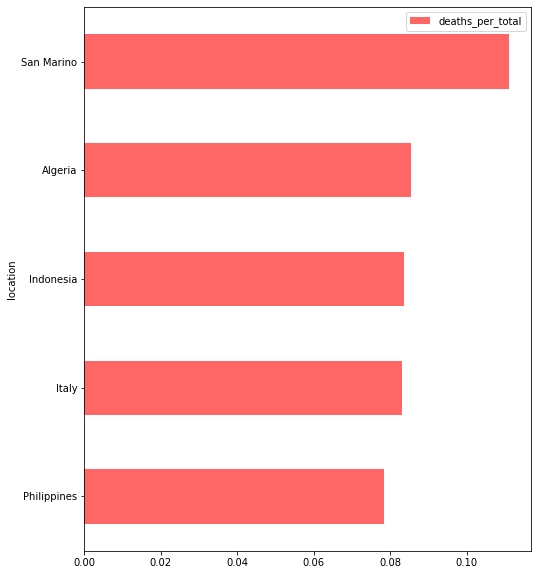

In [53]:
deaths_per_cases_pop.sort_values(by = 'deaths_per_total', ascending = True, inplace = True)
deaths_per_cases_fig = deaths_per_cases_pop.plot.barh(y = 'deaths_per_total', 
                                                      color ='red',
                                                      figsize = (8, 10),
                                                      alpha = 0.6).get_figure()
plt.savefig('deaths_per_cases.png')

In [54]:
filtered_for_table = deaths_per_cases_pop.drop(columns = ['new_cases', 'new_deaths', 'total_cases_pc', 'total_deaths_pc'])
filtered_for_table = filtered_for_table.reset_index()
filtered_for_table = filtered_for_table.rename(columns = {'2018':'population'})
filtered_for_table

,location,total_cases,total_deaths,deaths_per_total,population
0,Philippines,230,18,0.0783,106651922.0
1,Italy,41035,3407,0.0830,60431283.0
2,Indonesia,227,19,0.0837,267663435.0
3,Algeria,82,7,0.0854,42228429.0
4,San Marino,126,14,0.1111,33785.0


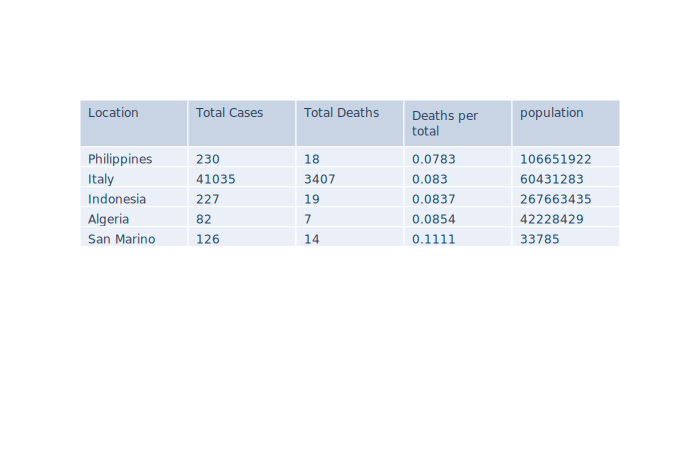

In [55]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Location', 
                        'Total Cases', 
                        'Total Deaths',
                        'Deaths per total', 
                        'population'],
                align='left'),
    cells=dict(values=[filtered_for_table['location'], 
                       filtered_for_table['total_cases'], 
                       filtered_for_table['total_deaths'], 
                       filtered_for_table['deaths_per_total'],
                       filtered_for_table['population']
                      ],
               align='left'))
])

fig.show(renderer="svg")

### Canada, US, and Pakistan

In [56]:
filter_countries = ['Canada','United States', 'Pakistan']

In [57]:
data[data.index.isin(filter_countries)]

,new_cases,new_deaths,total_cases,total_deaths,total_cases_pc,total_deaths_pc,deaths_per_total
location,,,,,,,
Canada,156,1,846,10,0.000023,2.698410e-07,0.0118
Pakistan,176,2,478,2,0.000002,9.424403e-09,0.0042
United States,4835,0,14250,150,0.000044,4.584808e-07,0.0105


In [58]:
country_subset = rdata[rdata['location'].isin(filter_countries)]
country_subset

,date,location,new_cases,new_deaths,total_cases,total_deaths,date_fm
950,2019-12-31,Canada,0,0,0,0,2019-12-31
951,2020-01-01,Canada,0,0,0,0,2020-01-01
952,2020-01-02,Canada,0,0,0,0,2020-01-02
953,2020-01-03,Canada,0,0,0,0,2020-01-03
954,2020-01-04,Canada,0,0,0,0,2020-01-04
...,...,...,...,...,...,...,...
5732,2020-03-16,United States,823,12,3774,69,2020-03-16
5733,2020-03-17,United States,887,16,4661,85,2020-03-17
5734,2020-03-18,United States,1766,23,6427,108,2020-03-18
5735,2020-03-19,United States,2988,42,9415,150,2020-03-19


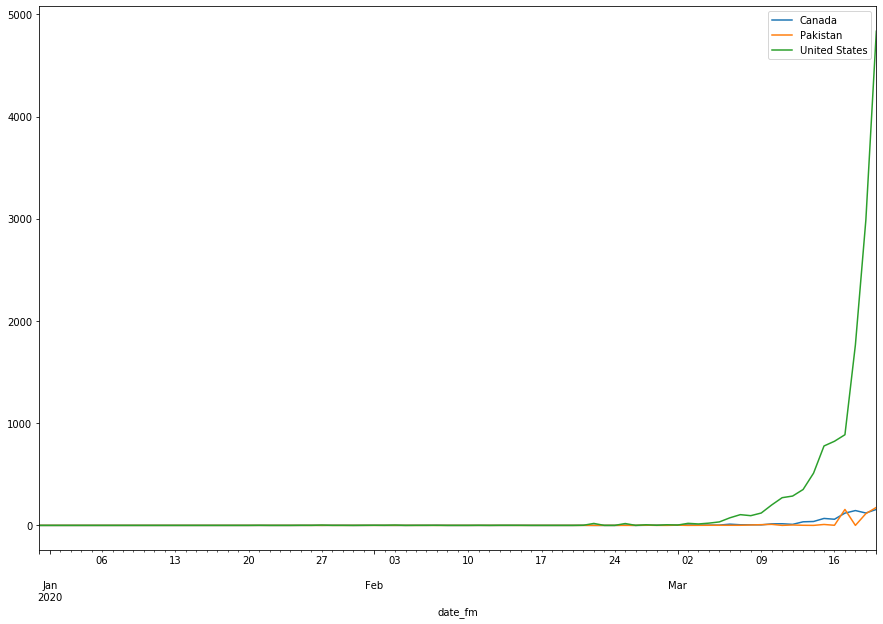

In [59]:
_, ax = plt.subplots(figsize = (15, 10))

for name, group in country_subset.groupby('location'):
    group.set_index('date_fm').plot(kind ='line', y = 'new_cases', ax = ax, label = name)

plt.show()

## Resources
1. Data obtained from: https://ourworldindata.org/coronavirus-source-data
2. Population data from: https://data.worldbank.org/indicator/SP.POP.TOTL